<h1>Cricket Fielding Analysis</h1>

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
df=pd.read_csv("advanced_task.csv")

In [259]:
df

,Player Name,Clean Picks (CP),Good Throws (GT),Catches (C),Dropped Catches (DC),Stumpings (S),Run Outs (RO),Missed Run Outs (MR),Direct Hits (DH),Runs Saved (RS),Unnamed: 10
0,Rilee russouw,2,1,1,0,0,0,0,1,2,NaN
1,Phil Salt,1,2,0,1,0,1,0,0,-1,NaN
2,Yash Dhull,3,1,2,0,0,0,1,0,3,NaN
3,Axer Patel,2,3,1,0,1,0,0,0,0,NaN
4,Lalit yadav,1,2,1,0,0,0,0,1,-2,NaN
5,Aman Khan,4,1,0,0,0,1,0,0,1,NaN
6,Kuldeep yadav,3,0,1,1,0,0,0,1,4,NaN


In [260]:
df=df.drop("Unnamed: 10",axis=1)

In [261]:
df

,Player Name,Clean Picks (CP),Good Throws (GT),Catches (C),Dropped Catches (DC),Stumpings (S),Run Outs (RO),Missed Run Outs (MR),Direct Hits (DH),Runs Saved (RS)
0,Rilee russouw,2,1,1,0,0,0,0,1,2
1,Phil Salt,1,2,0,1,0,1,0,0,-1
2,Yash Dhull,3,1,2,0,0,0,1,0,3
3,Axer Patel,2,3,1,0,1,0,0,0,0
4,Lalit yadav,1,2,1,0,0,0,0,1,-2
5,Aman Khan,4,1,0,0,0,1,0,0,1
6,Kuldeep yadav,3,0,1,1,0,0,0,1,4


<h4>This is the dataset of the player in the 1st innings of the IPL match number 2367 </h4>

In [262]:
df.columns=['Player Name','Clean Picks','Good Throws','Catches','Dropped Catches','Stumpings','Run Outs','Missed Run Outs','Direct Hits','Runs Saved']

In [263]:
df

,Player Name,Clean Picks,Good Throws,Catches,Dropped Catches,Stumpings,Run Outs,Missed Run Outs,Direct Hits,Runs Saved
0,Rilee russouw,2,1,1,0,0,0,0,1,2
1,Phil Salt,1,2,0,1,0,1,0,0,-1
2,Yash Dhull,3,1,2,0,0,0,1,0,3
3,Axer Patel,2,3,1,0,1,0,0,0,0
4,Lalit yadav,1,2,1,0,0,0,0,1,-2
5,Aman Khan,4,1,0,0,0,1,0,0,1
6,Kuldeep yadav,3,0,1,1,0,0,0,1,4


<h4>Here all this Weights are given in the data set</h4>

In [264]:
weights = {
    "Clean Picks": 1,
    "Good Throws": 1,
    "Catches": 3,
    "Dropped Catches": -3,
    "Stumpings": 3,
    "Run Outs": 3,
    "Missed Run Outs": -3,
    "Direct Hits": 2
}

In [265]:
def calculate_performance_score(row,weights):
    return(
        ( row['Clean Picks'] * weights['Clean Picks'] ) +
        ( row['Good Throws'] * weights['Good Throws'] ) +
        ( row['Catches'] * weights['Catches'] ) +
        ( row['Dropped Catches'] * weights['Dropped Catches'] ) +
        ( row['Stumpings'] * weights['Stumpings'] ) +
        ( row['Run Outs'] * weights['Run Outs'] ) +
        ( row['Missed Run Outs'] * weights['Missed Run Outs']) +
        ( row['Direct Hits'] * weights['Direct Hits']) +
          row['Runs Saved']
    )

In [266]:
df['Performance Score'] = df.apply(lambda row: calculate_performance_score(row, weights), axis=1)

In [267]:
df

,Player Name,Clean Picks,Good Throws,Catches,Dropped Catches,Stumpings,Run Outs,Missed Run Outs,Direct Hits,Runs Saved,Performance Score
0,Rilee russouw,2,1,1,0,0,0,0,1,2,10
1,Phil Salt,1,2,0,1,0,1,0,0,-1,2
2,Yash Dhull,3,1,2,0,0,0,1,0,3,10
3,Axer Patel,2,3,1,0,1,0,0,0,0,11
4,Lalit yadav,1,2,1,0,0,0,0,1,-2,6
5,Aman Khan,4,1,0,0,0,1,0,0,1,9
6,Kuldeep yadav,3,0,1,1,0,0,0,1,4,9


In [268]:
df.to_csv('detailed_fileding_data.csv',index=False)

In [269]:
summarized_data=df[['Player Name','Performance Score']]

In [270]:
summarized_data

,Player Name,Performance Score
0,Rilee russouw,10
1,Phil Salt,2
2,Yash Dhull,10
3,Axer Patel,11
4,Lalit yadav,6
5,Aman Khan,9
6,Kuldeep yadav,9


<h2>Analysing Overall Performance </h2>

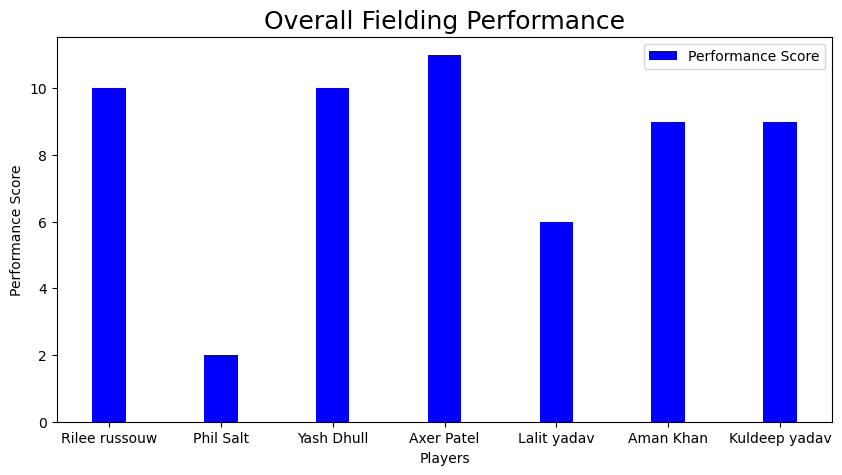

In [271]:
x=np.arange(7)
plt.figure(figsize=(10,5))
plt.bar(x, df['Performance Score'], width=0.3, label="Performance Score", color="blue")
plt.xticks(x, df["Player Name"])
plt.xlabel("Players")
plt.ylabel("Performance Score")
plt.title("Overall Fielding Performance",fontsize=18)
plt.legend()
plt.show()

<p>By analysing Axer Patel ,Rilee russouw and Yash Dhull performed we</p>


<h3>Selecting the three players: </h3> 
<p>Let it would be Rilee russouw , Aman Khan and Phil Salt <br> 
   let make analysis of contribution of this three players in the game</p>

In [272]:
ddf=df.loc[(df["Player Name"] == "Rilee russouw") | (df['Player Name'] == "Aman Khan") | ( df['Player Name'] == "Phil Salt" )]

In [273]:
ddf

,Player Name,Clean Picks,Good Throws,Catches,Dropped Catches,Stumpings,Run Outs,Missed Run Outs,Direct Hits,Runs Saved,Performance Score
0,Rilee russouw,2,1,1,0,0,0,0,1,2,10
1,Phil Salt,1,2,0,1,0,1,0,0,-1,2
5,Aman Khan,4,1,0,0,0,1,0,0,1,9


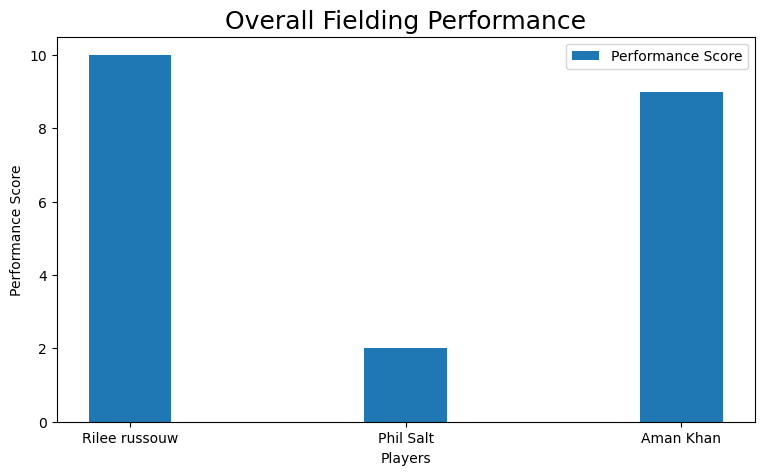

In [274]:
x=np.arange(3)
plt.figure(figsize=(9,5))
plt.bar(x, ddf['Performance Score'], width=0.3, label="Performance Score")
plt.xticks(x, ddf["Player Name"])
plt.xlabel("Players")
plt.ylabel("Performance Score")
plt.title("Overall Fielding Performance",fontsize=18)
plt.legend()
plt.show()

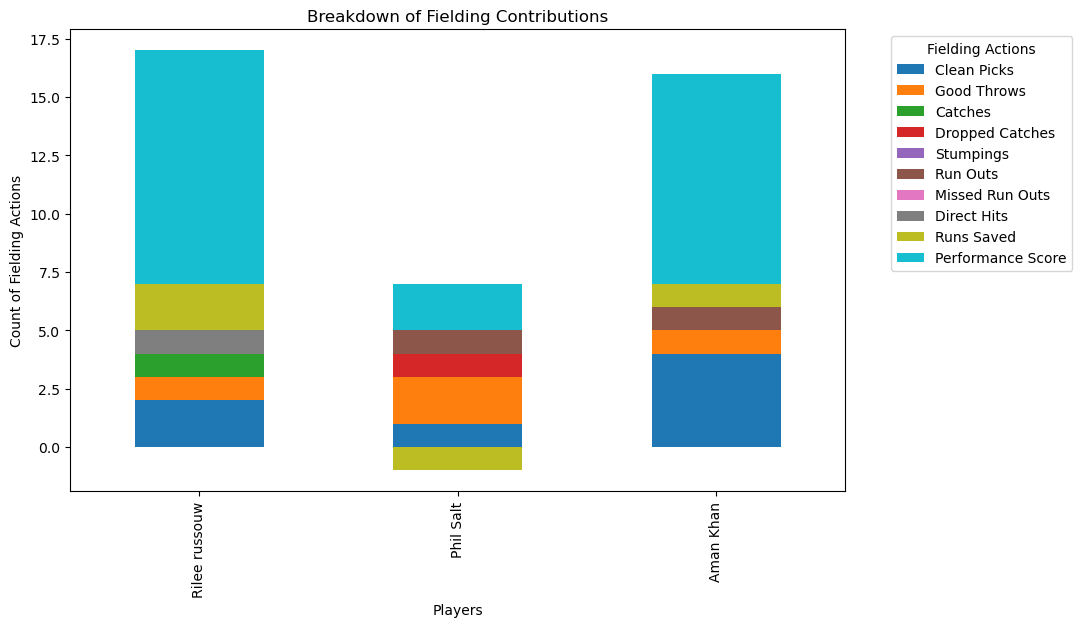

In [275]:
ddf.set_index("Player Name").plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Players")
plt.ylabel("Count of Fielding Actions")
plt.title("Breakdown of Fielding Contributions")
plt.legend(title="Fielding Actions", bbox_to_anchor=(1.05, 1))
plt.show()

<h4> Aman Khan excels in Clean Picks, while Rilee Russouw contributes with Direct Hits. </h4>

<p> Shows how each fielding action contributes to the total performance.</p>


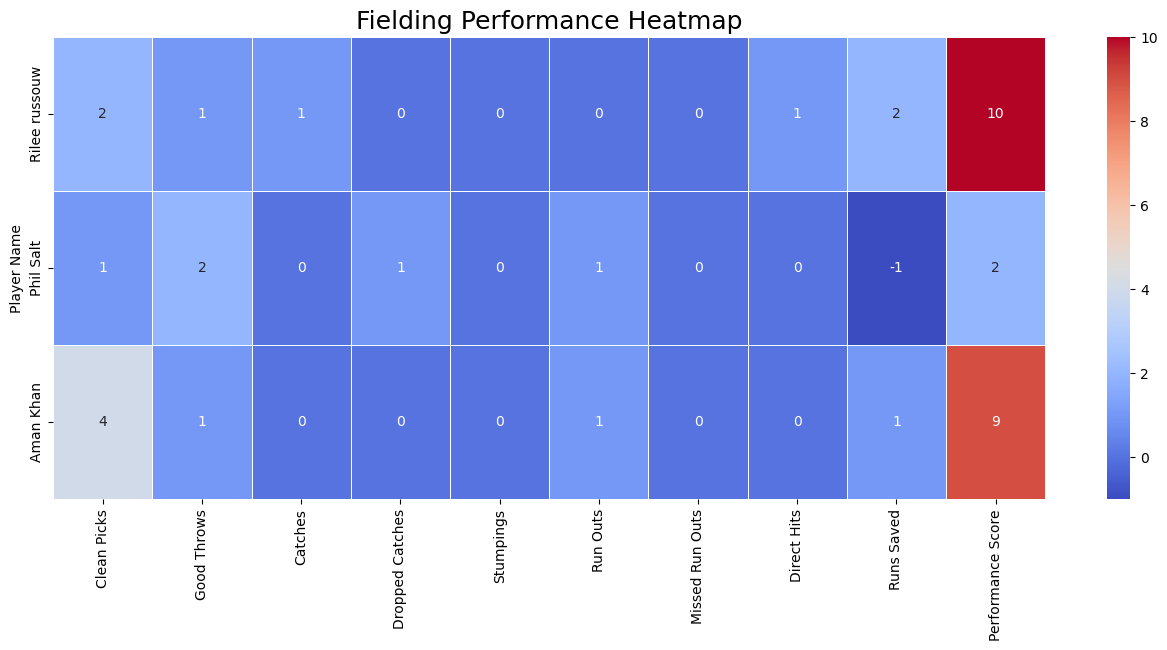

In [276]:
ddf.set_index("Player Name", inplace=True)
# Plot Heatmap
plt.figure(figsize=(16,6))
sns.heatmap(ddf, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Fielding Performance Heatmap",fontsize=18)
plt.show()

<h2>Conclusion:</h2>
<h4>From the analysis of the three selected players—Aman Khan, Rilee Russouw, and Phil Salt, we can conclude:</h4>
<ul>
    <li>Aman Khan performed the best among the three, excelling in Clean Picks and overall fielding contributions. His performance score reflects strong defensive play.</li>
    <li>Rilee Russouw had a moderate performance, making valuable Direct Hits and contributing positively to the team's fielding.</li>
    <li>Phil Salt had the least impact, with a lower performance score due to a dropped catch and runs conceded, which affected his overall fielding effectiveness.</li>
</ul>

<h4>Key Takeaways</h4>
<ul><li>Aman Khan is a reliable fielder with consistent clean pick-ups.</li>
<li>Rilee Russouw adds value through direct hits but needs improvement in other aspects.
</li>
<li>Phil Salt needs to work on minimizing fielding errors to contribute effectively.
</li></ul>



<b>This analysis highlights how each player's fielding actions contribute to the team's overall defensive strength.</b>